# 군집분석

In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN

/home/piai/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/piai/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/piai/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [9]:
df_raw = pd.read_csv("./Data/3. Big Data 분석/직무능력평가.csv",engine='python')

In [10]:
scaler = StandardScaler()
df_raw_scaled = scaler.fit_transform(df_raw)
df_raw_scaled[:5]

array([[-1.8076031 , -1.19166169, -1.92300586, -1.50494461, -0.35542617,
         1.77141034,  0.20430138],
       [-0.13647543, -0.19861028, -0.17733772, -0.20508842, -0.15977874,
        -0.18159526,  0.4020124 ],
       [ 0.53197564,  0.25972114,  1.23582221,  1.09476777,  1.11192959,
         1.15467173,  0.50086791],
       [-0.30358819, -0.27499885, -0.67610004, -0.81168798, -1.0401922 ,
         0.9490922 , -0.78425369],
       [ 1.36753948,  0.87082969,  0.23829756,  0.83479653,  0.622811  ,
         0.84630243,  0.4020124 ]])

In [11]:
df_raw_y = df_raw_scaled[:,0]
df_raw_x = df_raw_scaled[:,1::]

In [12]:
Z_ward = linkage(df_raw_x,method='ward',metric='euclidean')

 

Z_average = linkage(df_raw_x,method='average',metric='euclidean')

 

Z_Minkowski = linkage(df_raw_x,method='average',metric='minkowski')

Text(0, 0.5, 'sample index')

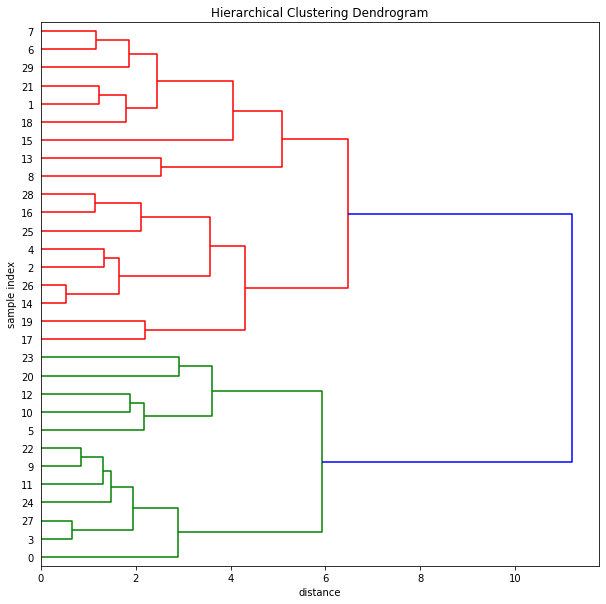

In [13]:
plt.figure(figsize=(10,10))
ax = plt.subplot(111)

 

dendrogram(Z_ward,leaf_font_size=10,orientation='right')
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

Text(0, 0.5, 'sample index')

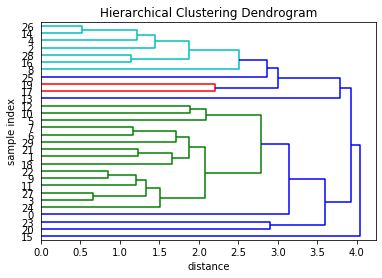

In [14]:
dendrogram(Z_Minkowski,leaf_font_size=10,orientation='right')
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

Text(0, 0.5, 'sample index')

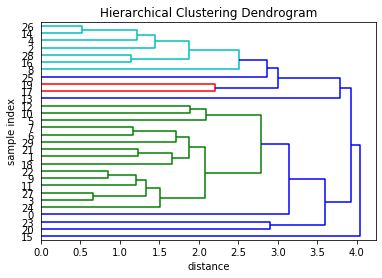

In [15]:
dendrogram(Z_average,leaf_font_size=10,orientation='right')
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

In [16]:
cluster_hierarchical = fcluster(Z=Z_ward,t=5,criterion="distance")
df_raw["ClusterHierarchical"] = cluster_hierarchical
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical
0,43,51,30,39,61,92,45,1
1,63,64,51,54,63,73,47,5
2,71,70,68,69,76,86,48,3
3,61,63,45,47,54,84,35,1
4,81,78,56,66,71,83,47,3


In [17]:
ds_summary_hc = df_raw.groupby("ClusterHierarchical").agg(["min","mean","max"])
level0 = ds_summary_hc.columns.get_level_values(0)
level1 = ds_summary_hc.columns.get_level_values(1)

 

ds_summary_hc.columns = level0 + "_"+level1
ds_summary_hc.reset_index(inplace=True)

In [18]:
ds_summary_hc.round(3)

,ClusterHierarchical,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,CHANCE_min,CHANCE_mean,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,43,57.429,67,51,58.857,66,30,43.571,52,39,45.000,50,51,59.429,66,74,81.143,92,33,38.571,45
1,2,40,53.200,69,37,49.400,62,33,46.800,57,34,47.200,58,43,52.000,58,49,60.000,67,25,35.000,49
2,3,50,71.889,85,58,73.889,85,54,63.333,71,54,68.111,75,55,74.333,88,74,79.000,86,46,54.667,72
3,4,68,70.000,72,82,82.500,83,72,77.500,83,45,56.000,67,59,65.000,71,77,80.000,83,31,33.000,35
4,5,58,69.143,82,61,72.714,90,39,47.143,52,54,59.286,72,60,66.286,75,54,72.000,85,35,40.714,47


In [22]:
n_iter_cluster=15
cluster_range=[i+1 for i in range(n_iter_cluster)]
clus_error=[]
for v_n_clus in cluster_range:
    clus=KMeans(v_n_clus)
    clus.fit(df_raw_x)
    clus_error.append(clus.inertia_)
df_error=pd.DataFrame({"NumberofCluster":cluster_range,'Error':clus_error})

Text(0, 0.5, 'Sum of squared distance')

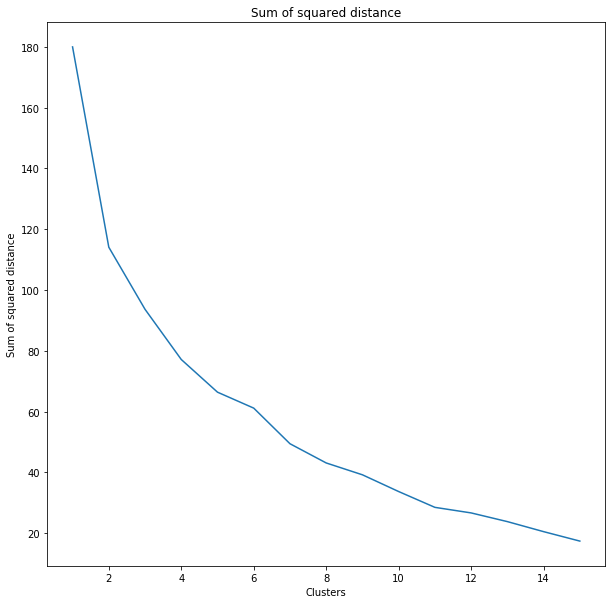

In [23]:
plt.figure(figsize=(10,10))
plt.plot(df_error['NumberofCluster'],ds_error['Error'])
plt.title("Sum of squared distance")
plt.xlabel('Clusters')
plt.ylabel('Sum of squared distance')

In [24]:
clus=KMeans(5)
clus.fit(df_raw_x)
cluster_kmeans=[i+1 for i in clus.labels_]
df_raw['Clusterkmeans']=cluster_kmeans
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,Clusterkmeans
0,43,51,30,39,61,92,45,1,2
1,63,64,51,54,63,73,47,5,4
2,71,70,68,69,76,86,48,3,1
3,61,63,45,47,54,84,35,1,2
4,81,78,56,66,71,83,47,3,1


In [29]:
df_summary_km=df_raw.drop('ClusterHierarchical', axis=1, inplace=False).groupby('Clusterkmeans').agg(["min","mean","max"])

 

level0=df_summary_km.columns.get_level_values(0)
level1=df_summary_km.columns.get_level_values(1)
df_summary_km.columns=level0+"_"+level1
df_summary_km.reset_index(inplace=True)
df_summary_km.round(3)

,Clusterkmeans,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,CHANCE_min,CHANCE_mean,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,50,71.200,85,58,73.500,85,46,61.600,71,54,67.000,75,55,74.400,88,74,79.600,86,46,53.800,72
1,2,43,58.875,69,51,59.250,66,30,45.250,57,39,44.625,50,51,58.875,66,63,78.875,92,25,36.875,45
2,3,40,44.333,50,37,44.000,55,33,41.333,49,34,45.333,58,43,49.000,54,49,56.667,64,33,38.667,49
3,4,58,69.000,82,53,70.286,90,39,48.143,53,54,59.429,72,58,63.857,70,54,69.429,80,34,39.000,47
4,5,68,70.000,72,82,82.500,83,72,77.500,83,45,56.000,67,59,65.000,71,77,80.000,83,31,33.000,35


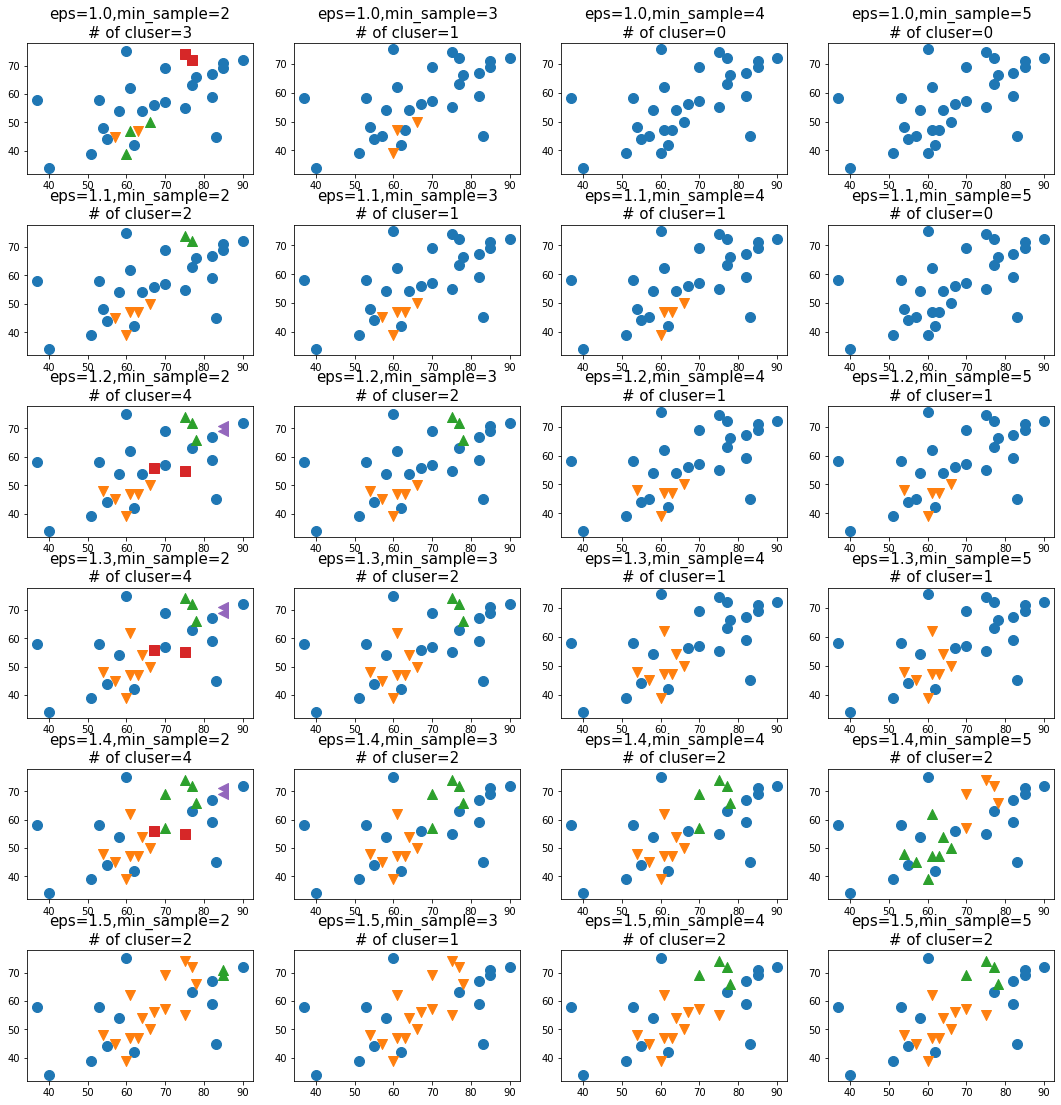

In [34]:
X=df_raw["DISSATIS"]
Y=df_raw["CHANCE"]

markers=["o","v","^","s","<",">","p","D"]


para_eps=[k/10 for k in range(10,16,1)]
para_min_sample=[2,3,4,5]
fig,axes=plt.subplots(len(para_eps),len(para_min_sample),figsize=(15,15))
fig.tight_layout(w_pad=1,h_pad=3)
 

for i, eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan=DBSCAN(min_samples=min_sample,eps=eps)
        clusters=dbscan.fit_predict(df_raw_x)
        clusters=clusters + 1
        for (n_clus,clus) in enumerate(range(min(clusters),max(clusters)+1,1)):
            axes[i,j].scatter(X[clusters==clus], Y[clusters==clus], marker=markers[n_clus],s=100)
            axes[i,j].set_title("eps="+str(eps)+",min_sample="+str(min_sample)+"\n# of cluser=" +str(max(clusters)),fontsize=15)

In [35]:
dbscan=DBSCAN(eps=1.4, min_samples=2).fit(df_raw_x)
cluster_dbscan=dbscan.labels_

 

for (i,val) in enumerate(cluster_dbscan):
    if val<0:
        cluster_dbscan[i]=0
    else:
        cluster_dbscan[i]=cluster_dbscan[i]+1
df_raw["ClusterDBScan"]=cluster_dbscan
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,Clusterkmeans,ClusterDBScan
0,43,51,30,39,61,92,45,1,2,0
1,63,64,51,54,63,73,47,5,4,1
2,71,70,68,69,76,86,48,3,1,2
3,61,63,45,47,54,84,35,1,2,1
4,81,78,56,66,71,83,47,3,1,2


In [38]:
df_summary_db=df_raw.drop(["ClusterHierarchical","Clusterkmeans"],axis=1,inplace=False).groupby("ClusterDBScan").agg(["min","mean","max"])

 

level0=df_summary_db.columns.get_level_values(0)
level1=df_summary_db.columns.get_level_values(1)
df_summary_db.columns=level0+"_"+level1
df_summary_db.reset_index(inplace=True)
df_summary_db.round(3)

,ClusterDBScan,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,CHANCE_min,CHANCE_mean,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,0,40,61.00,82,37,63.846,90,30,54.385,83,34,54.615,75,43,60.154,88,49,70.615,92,25,41.923,72
1,1,48,60.75,67,54,60.750,66,42,47.250,52,39,49.000,62,51,60.500,66,73,78.625,84,33,39.125,47
2,2,65,74.40,81,70,74.000,78,46,56.400,68,57,67.600,74,71,76.200,80,77,81.800,86,46,47.200,49
3,3,58,64.50,71,67,71.000,75,42,46.000,50,55,55.500,56,66,68.000,70,66,67.000,68,35,38.000,41
4,4,74,79.50,85,85,85.000,85,64,67.500,71,69,70.000,71,77,78.000,79,74,76.500,79,55,59.000,63


# 연관규칙

In [ ]:
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 853 kB/s eta 0:00:01


In [2]:
import pandas as pd
import numpy as np

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

/home/piai/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/piai/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/piai/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/piai/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
df_raw = [['소주', '콜라', '맥주'],
         ['소주', '콜라', '와인'],
         ['소주', '주스'],
         ['콜라', '맥주'],
         ['소주', '콜라', '맥주', '와인'],
         ['주스']]
df_raw

[['소주', '콜라', '맥주'],
 ['소주', '콜라', '와인'],
 ['소주', '주스'],
 ['콜라', '맥주'],
 ['소주', '콜라', '맥주', '와인'],
 ['주스']]

In [4]:
enc = TransactionEncoder()
df_raw_enc = enc.fit_transform(X = df_raw)

df_asso = pd.DataFrame(df_raw_enc, columns=enc.columns_)
df_asso.head()

,맥주,소주,와인,주스,콜라
0,True,True,False,False,True
1,False,True,True,False,True
2,False,True,False,True,False
3,True,False,False,False,True
4,True,True,True,False,True


In [5]:
v_min_sup = 0.5
df_freq = apriori(df_asso, min_support=v_min_sup, use_colnames=True)
df_freq.round(3)

,support,itemsets
0,0.500,(맥주)
1,0.667,(소주)
2,0.667,(콜라)
3,0.500,"(콜라, 맥주)"
4,0.500,"(콜라, 소주)"


In [6]:
df_asso_rule = association_rules(df_freq, metric='confidence', min_threshold=0.5)
df_asso_rule.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(콜라),(맥주),0.666667,0.500000,0.5,0.75,1.500,0.166667,2.000000
1,(맥주),(콜라),0.500000,0.666667,0.5,1.00,1.500,0.166667,inf
2,(콜라),(소주),0.666667,0.666667,0.5,0.75,1.125,0.055556,1.333333
3,(소주),(콜라),0.666667,0.666667,0.5,0.75,1.125,0.055556,1.333333
